# || The Sparks Foundation ||
# GRIPAUGUST21
# Computer Vision & IoT Intern
# Task 1: Object Detection / Optical Character Recognition (ORC) Project
# NAME: Kulshrestha Utkarsh Alok

# 1 - Optical Character Recognition (OCR) using Pytesseract

# Importing Libraries

In [1]:
import pytesseract

In [2]:
import cv2 # pip install opencv-python

In [3]:
import matplotlib.pyplot as plt ## pip install matplotlib

# For Configuration

In [4]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\\tesseract.exe'

In [5]:
img = cv2.imread('Desktop\\Demo.png')

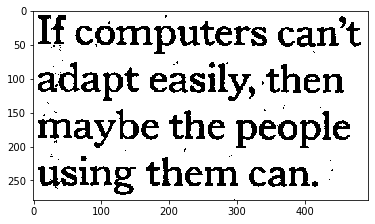

In [6]:
plt.imshow(img)

In [7]:
img2char = pytesseract.image_to_string(img)

In [8]:
imgbox = pytesseract.image_to_boxes(img)

In [9]:
type(imgbox)

str

In [10]:
print(imgbox)

I 7 228 29 271 0
f 27 219 49 272 0
c 62 225 121 264 0
o 107 214 141 271 0
m 123 228 177 256 0
p 168 214 196 271 0
u 179 214 211 271 0
t 213 226 246 256 0
e 247 226 268 263 0
r 269 226 294 255 0
s 297 225 345 255 0
c 361 225 387 254 0
a 389 216 417 254 0
n 419 226 451 254 0
’ 451 251 462 270 0
t 462 225 483 261 0
a 7 140 37 198 0
d 37 159 69 206 0
a 58 140 84 206 0
p 71 158 100 188 0
t 103 146 156 195 0
e 172 158 198 187 0
a 188 145 213 204 0
s 201 157 229 204 0
i 231 157 254 187 0
l 258 159 270 202 0
y 273 145 321 202 0
, 318 148 327 167 0
t 338 157 364 193 0
h 365 157 395 200 0
e 398 157 423 185 0
n 427 157 458 185 0
m 8 84 58 130 0
a 42 71 75 133 0
y 60 89 88 119 0
b 90 77 122 118 0
e 123 71 186 133 0
t 201 89 222 125 0
h 222 71 254 132 0
e 258 88 283 117 0
p 299 76 331 117 0
e 333 88 359 134 0
o 360 88 390 140 0
p 382 76 409 140 0
l 393 76 424 117 0
e 426 88 468 131 0
u 7 18 40 65 0
s 40 21 65 50 0
i 68 22 82 65 0
n 84 21 116 50 0
g 119 8 152 49 0
t 166 20 188 56 0
h 190 20 221 63 0

In [11]:
imgH, imgW,_ = img.shape

In [12]:
img.shape

(279, 494, 3)

In [13]:
for boxes in imgbox.splitlines():
    boxes = boxes.split(' ')
    x,y,w, h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
    cv2.rectangle(img, (x,imgH-y), (w,imgH-h), (0,0,255),3)

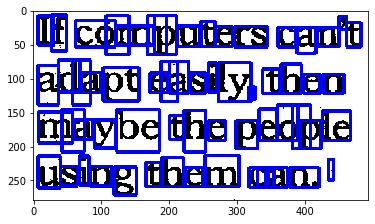

In [14]:
plt.imshow(img) ## By default cv2=> BGR

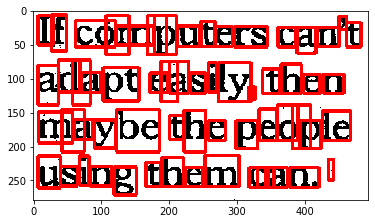

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Image to Text

In [16]:
print(img2char)

If computers can’t
adapt easily, then
maybe the people
using them can. ’



# 2 - Object Detection and Recognition

# Import Libraries

In [17]:
import cv2 # pip install opencv-python

In [18]:
import matplotlib.pyplot as plt # pip install matplotlib

In [19]:
config_file = 'E:\Sparks foundation\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'E:\Sparks foundation\\frozen_inference_graph.pb'

In [20]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [21]:
classLabels = [] ## empty list of python
file_name = 'E:\Sparks foundation\\Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [22]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [23]:
print(len(classLabels))

80


In [24]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1.1]
model.setInputSwapRB(True)

<dnn_Model 00000215551CBE90>

# Read an image

In [25]:
img = cv2.imread(r'E:\Sparks foundation\\images.jfif')

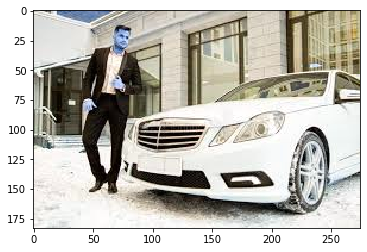

In [26]:
plt.imshow(img) ## bgr

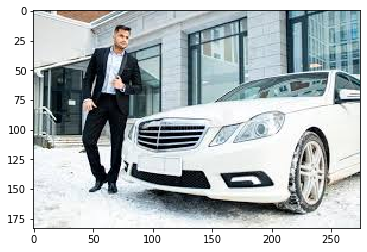

In [27]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [28]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [29]:
print(ClassIndex)

[[1]
 [3]]


In [30]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    #cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
    #cv2.putText(img,text,(text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)
    cv2.rectangle(img,boxes,(255,0,0), 2 )
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=2)

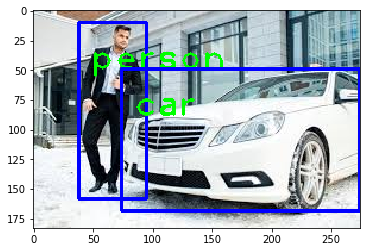

In [31]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))